In [28]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os



In [31]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [32]:
img_path = '/kaggle/input/dataset/ECG Images of COVID-19 Patients (250)/Binder1_Page_001.jpg'

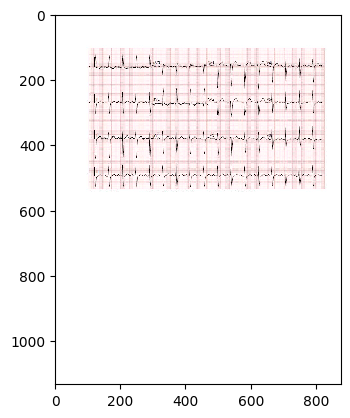

In [33]:
from tensorflow.keras.preprocessing import image
img = image.load_img(img_path)
plt.imshow(img,interpolation='nearest')
plt.show()

In [34]:
# import cv2
# img = cv2.imread(img_path)
# crop_img = img[ img.shape[0] - 1273 : -80,
#                 img.shape[1] - 2131 : 2074+75 ]



# plt.imshow(crop_img,interpolation='nearest')
# plt.show()

In [86]:
X = []
Y = []
image_size = 128

In [87]:
ecg_path = '/kaggle/input/dataset'

In [88]:
labels = os.listdir(ecg_path)
labels

['Normal Person ECG Images (859)',
 'ECG Images of Myocardial Infarction Patients (77)',
 'ECG Images of Patient that have abnormal heart beats (548)',
 'ECG Images of COVID-19 Patients (250)',
 'ECG Images of Patient that have History of MI (203)']

In [89]:
# covid_path='/kaggle/input/dataset/ECG Images of COVID-19 Patients (250)'

In [90]:
for i in labels:
    targetPath = os.path.join(ecg_path,i)
    # print(targetPath)
    for j in os.listdir(targetPath):
        img = cv2.imread(os.path.join(targetPath,j))

#         if(i != covid_path):
#             img = img[ img.shape[0] - 1273 : -80,
#                         img.shape[1] - 2131 : 2074+75 ]
        
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        Y.append(i)    
       

In [91]:
X = np.array(X)
Y = np.array(Y)  

In [92]:
Y

array(['Normal Person ECG Images (859)', 'Normal Person ECG Images (859)',
       'Normal Person ECG Images (859)', ...,
       'ECG Images of Patient that have History of MI (203)',
       'ECG Images of Patient that have History of MI (203)',
       'ECG Images of Patient that have History of MI (203)'],
      dtype='<U58')

In [93]:
X,Y = shuffle(X,Y,random_state=101)

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [95]:
# for i in y_train:
#    print(i)

In [96]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new

In [97]:
# Encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [115]:
X_train.shape

(1545, 128, 128, 3)

In [110]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(image_size,image_size,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(5,activation='softmax'))



In [111]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 128)      512       
 ormalization)                                                   
                                                                 
 dropout_18 (Dropout)        (None, 63, 63, 128)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)      

In [112]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [113]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20


2023-05-05 07:13:46.705752: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


44/44 [==============================] - 5s 46ms/step - loss: 1.6333 - accuracy: 0.6043 - val_loss: 80.5097 - val_accuracy: 0.2645
Epoch 2/20
44/44 [==============================] - 2s 37ms/step - loss: 0.7901 - accuracy: 0.6842 - val_loss: 17.8771 - val_accuracy: 0.2645
Epoch 3/20
44/44 [==============================] - 2s 36ms/step - loss: 0.6799 - accuracy: 0.7396 - val_loss: 12.5785 - val_accuracy: 0.2645
Epoch 4/20
44/44 [==============================] - 2s 36ms/step - loss: 0.6871 - accuracy: 0.7453 - val_loss: 10.6454 - val_accuracy: 0.2645
Epoch 5/20
44/44 [==============================] - 2s 36ms/step - loss: 0.6481 - accuracy: 0.7525 - val_loss: 3.6612 - val_accuracy: 0.2839
Epoch 6/20
44/44 [==============================] - 2s 37ms/step - loss: 0.5750 - accuracy: 0.7705 - val_loss: 7.3217 - val_accuracy: 0.2645
Epoch 7/20
44/44 [==============================] - 2s 37ms/step - loss: 0.5305 - accuracy: 0.7942 - val_loss: 7.2097 - val_accuracy: 0.2645
Epoch 8/20
44/44 [==

In [ ]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

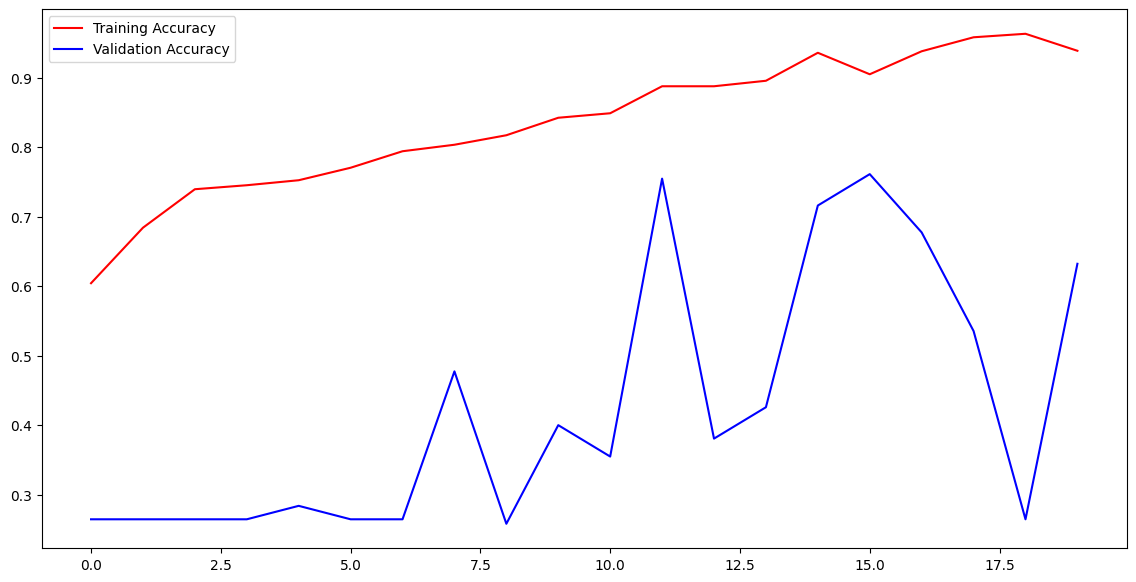

In [114]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

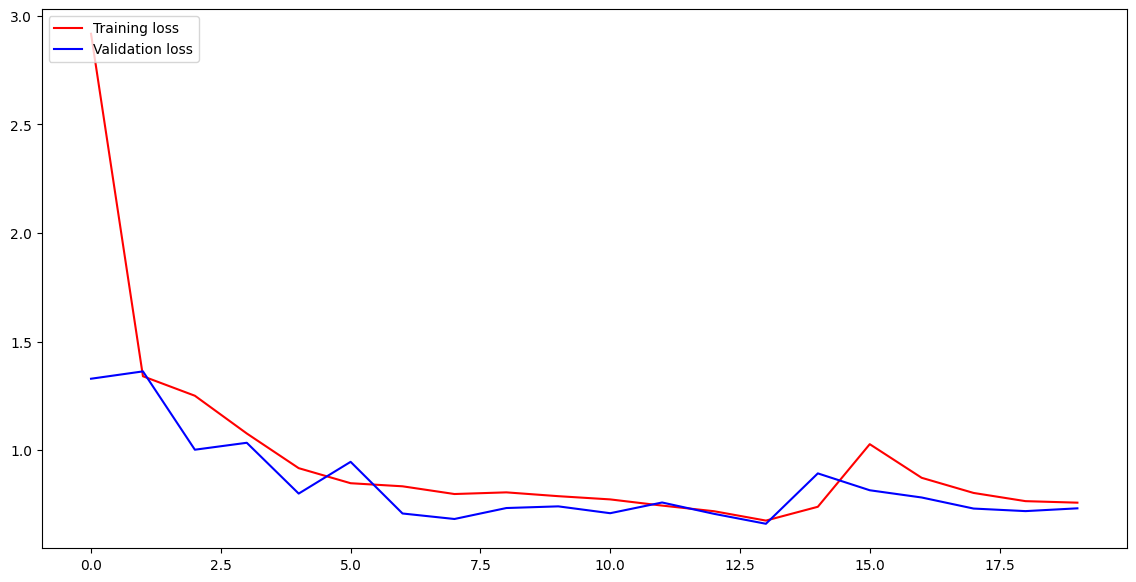

In [103]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()